# **Custom metric evaluation**

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

import plots
import constants

## **Constants**

In [14]:
METRIC_EVALUATION_FOLDER = constants.METRIC_EVALUATION_FOLDER
DEFAULT_PARAMS_MODEL_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'marian_transformer.csv')
MARIAN_RNN_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'marian_RNN.csv')
LAST_MODELS_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'last_results.csv')

In [15]:
dataset_transformer = pd.read_csv(DEFAULT_PARAMS_MODEL_RESULTS)
dataset_transformer.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
37,2023-06-20 19:31:35.051751,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,180,{'train-sets': ['/docker/home/marianmt/artifac...
38,2023-06-20 19:36:22.178937,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,2.322370,190,{'train-sets': ['/docker/home/marianmt/artifac...
39,2023-06-20 19:36:22.178937,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,190,{'train-sets': ['/docker/home/marianmt/artifac...
40,2023-06-20 19:41:09.727471,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,2.322370,200,{'train-sets': ['/docker/home/marianmt/artifac...
41,2023-06-20 19:41:09.727471,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,200,{'train-sets': ['/docker/home/marianmt/artifac...


In [16]:
dataset_RNN = pd.read_csv(MARIAN_RNN_RESULTS)
dataset_RNN.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
35,2023-06-21 00:24:07.249696,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,180,{'train-sets': ['/docker/home/marianmt/artifac...
36,2023-06-21 00:28:45.631677,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,10.724083,190,{'train-sets': ['/docker/home/marianmt/artifac...
37,2023-06-21 00:28:45.631677,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,190,{'train-sets': ['/docker/home/marianmt/artifac...
38,2023-06-21 00:33:23.857982,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,10.724083,200,{'train-sets': ['/docker/home/marianmt/artifac...
39,2023-06-21 00:33:23.857982,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,200,{'train-sets': ['/docker/home/marianmt/artifac...


In [17]:
def plot_metrics(df, title, column, ax):
    sns.lineplot(data=df, x="epoch", y=column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(title)

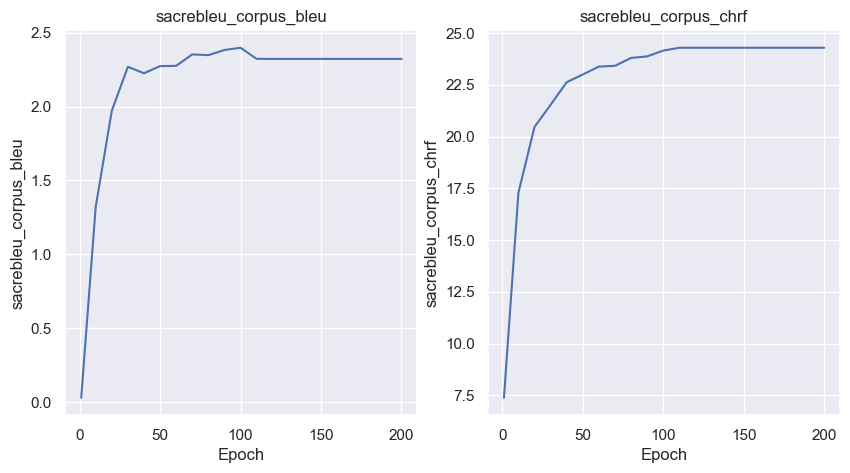

Maximum sacrebleu_corpus_bleu score: 2.3976187103216398
Maximum sacrebleu_corpus_chrf score: 24.287167745877383


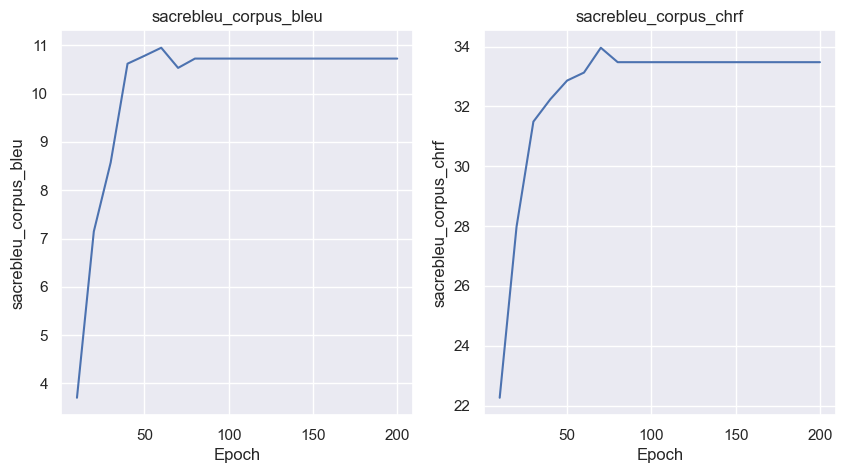

Maximum sacrebleu_corpus_bleu score: 10.948306278543276
Maximum sacrebleu_corpus_chrf score: 33.95939658753564


In [18]:
for dataset in [dataset_transformer, dataset_RNN]:
    score_types = dataset['score_type'].unique()
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(1, len(score_types), figsize=(10, 5))
    for idx, metric in enumerate(score_types):
        plot_metrics(
            dataset[dataset['score_type'] == metric],
            metric,
            'score',
            ax[idx],
        )
    plt.show(block=False)

    for idx, metric in enumerate(score_types):
        print(f'Maximum {metric} score: ', end='')
        print(max(dataset[dataset['score_type'] == metric]['score']))

## **Latest results**

In [19]:
results_df = plots.create_df_from_results_csv(LAST_MODELS_RESULTS)

In [20]:
results_df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
261,2023-06-29 09:36:01.955179,es_es_scored_june_sp.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,18.187268,180,{'train-sets': ['/docker/home/marianmt/artifac...
262,2023-06-29 09:36:20.887309,es_es_scored_june_sp.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.404616,190,{'train-sets': ['/docker/home/marianmt/artifac...
263,2023-06-29 09:36:20.887309,es_es_scored_june_sp.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,18.187268,190,{'train-sets': ['/docker/home/marianmt/artifac...
264,2023-06-29 09:36:39.470991,es_es_scored_june_sp.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.404616,200,{'train-sets': ['/docker/home/marianmt/artifac...
265,2023-06-29 09:36:39.470991,es_es_scored_june_sp.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,18.187268,200,{'train-sets': ['/docker/home/marianmt/artifac...


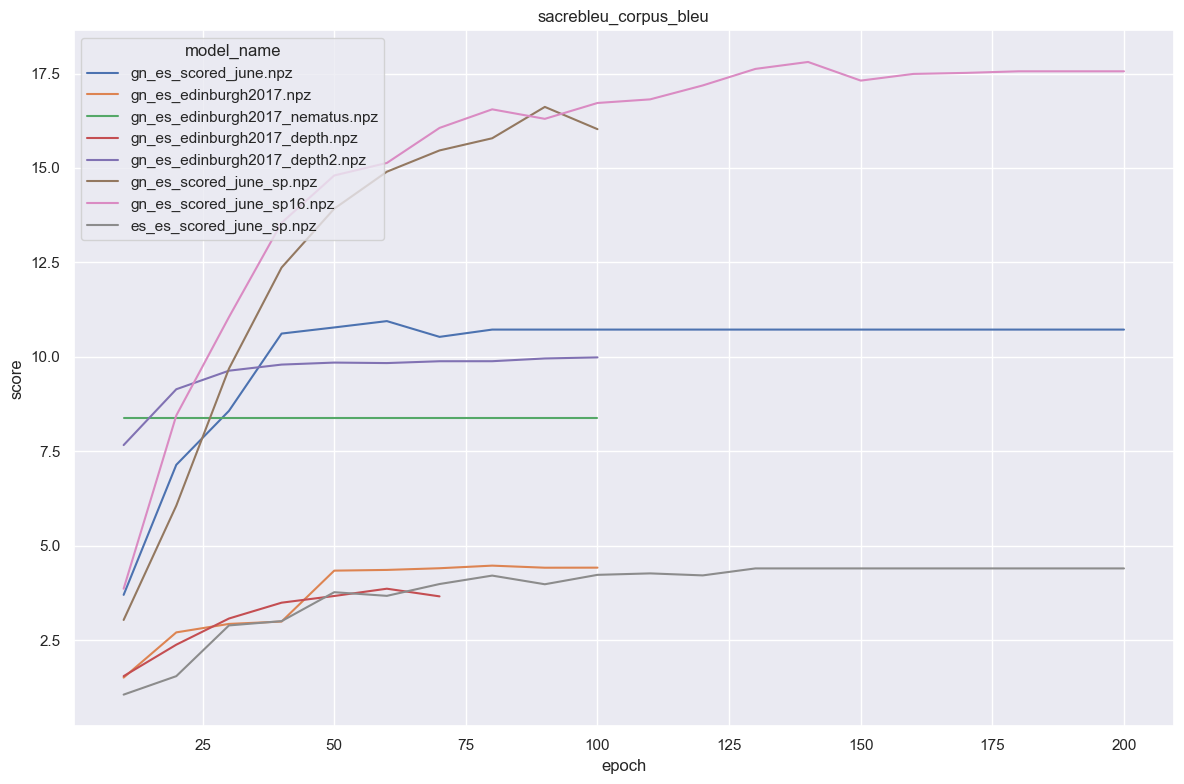

In [21]:
plots.plot_metric_by_epoch_foreach_model(results_df, metric='sacrebleu_corpus_bleu');

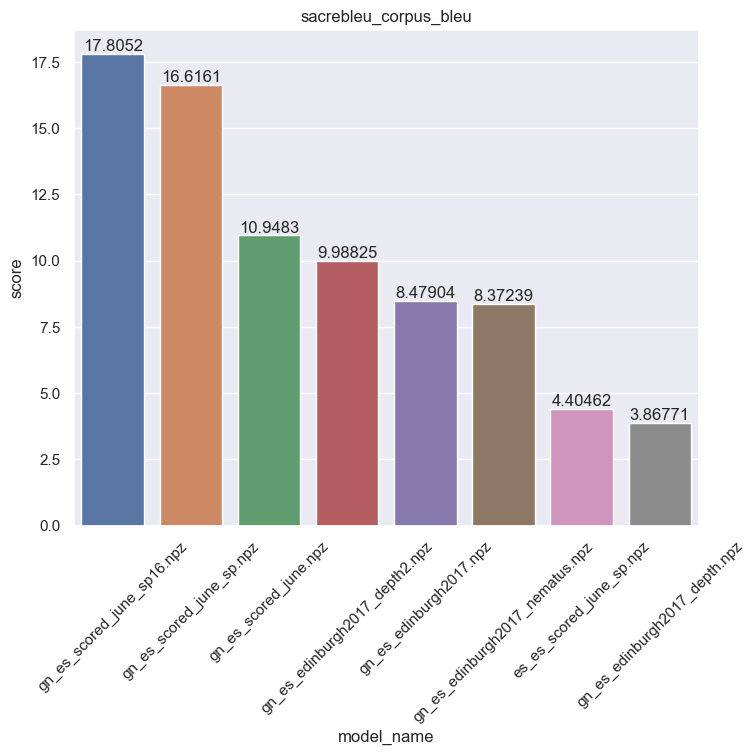

In [22]:
plots.plot_max_score_by_model(results_df, metric='sacrebleu_corpus_bleu');

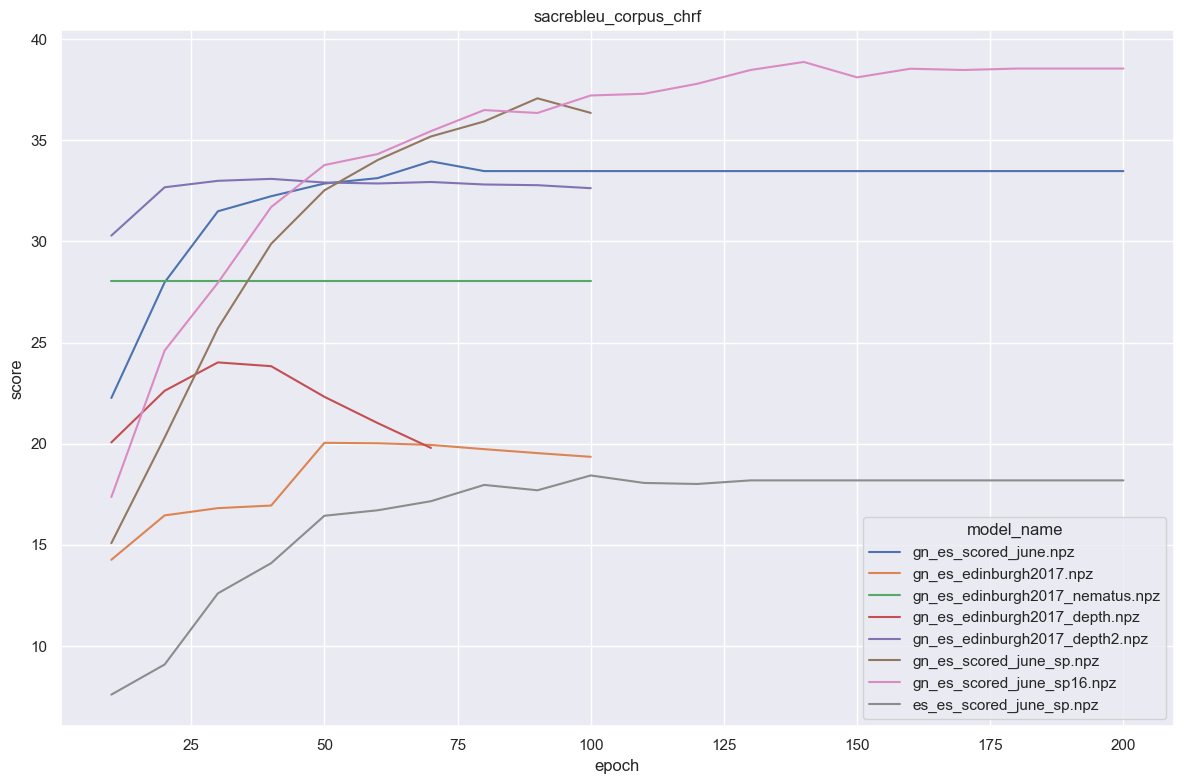

In [23]:
plots.plot_metric_by_epoch_foreach_model(results_df, metric='sacrebleu_corpus_chrf');

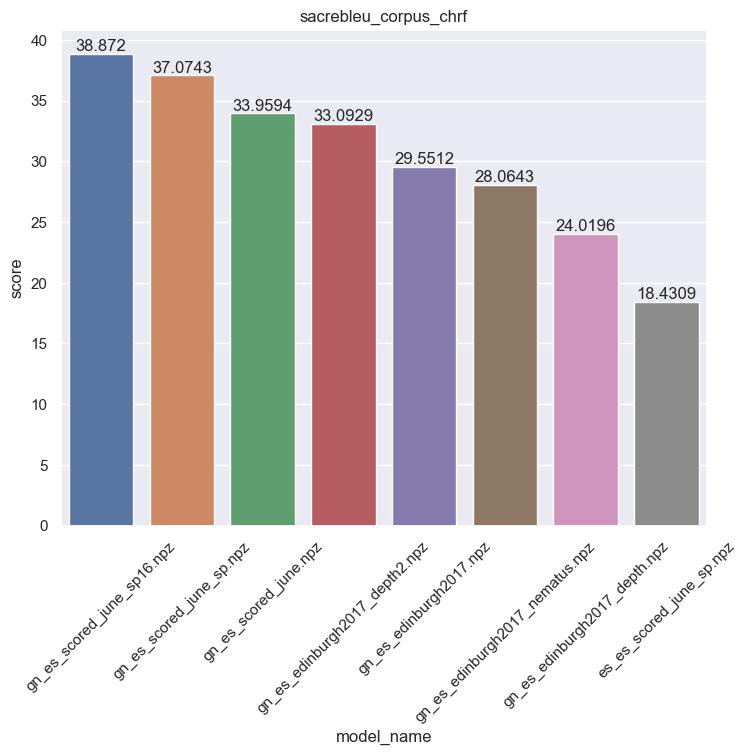

In [24]:
plots.plot_max_score_by_model(results_df, metric='sacrebleu_corpus_chrf');